A quick python parser for the data from the excellent website https://energy-charts.info/index.html?l=en&c=UK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy as sp
from datetime import timedelta
from functions.util import get_prod

In [2]:
sns.set_style("whitegrid")

Matplotlib does not like the little legend hack we do in the plot_prod function, so we deactivate warnings.

In [3]:
import warnings
warnings.filterwarnings('ignore')

Single area graph with options for cumulative, rolling average, etc.
Pick country, year, and it plots the production (and load, if chosen).

https://energy-charts.info/charts/energy/data/eu/day_2016.json
https://energy-charts.info/charts/energy/data/eu/day_2019.json
https://energy-charts.info/charts/energy/data/eu/day_2020.json
https://energy-charts.info/charts/energy/data/eu/day_2021.json


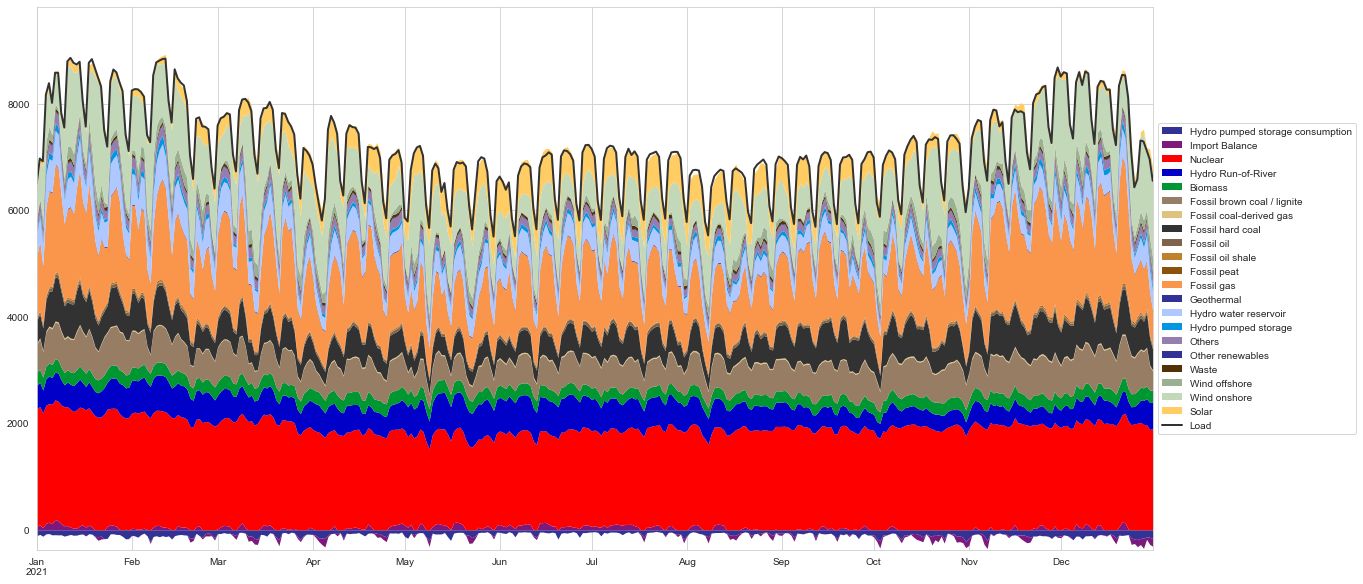

In [5]:
rolling=1 # rolling period (choose a multiple of 7 for best results)
country='eu'

prod_df_2016, load_df, colors_2016 = get_prod(country=country, # country code
                             year='2016',  # year
                             display=False, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

# prod_df_2018, load_df, colors = plot_prod(country=country, # country code
#                              year='2018',  # year
#                              display=True, # display chart (or just save data)
#                              load=True,    # show load
#                              cumul=False,  # cumulative
#                              rolling=rolling,   # rolling average, in timesteps
#                              lang='en')    # language

prod_df_2019, load_df, colors_2019 = get_prod(country=country, # country code
                             year='2019',  # year
                             display=False, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

prod_df_2020, load_df, colors_2020 = get_prod(country=country, # country code
                             year='2020',  # year
                             display=False, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

prod_df_2021, load_df, colors_2021 = get_prod(country=country, # country code
                             year='2021',  # year
                             display=True, # display chart (or just save data)
                             load=True,    # show load
                             cumul=False,  # cumulative
                             rolling=rolling,   # rolling average, in timesteps
                             lang='en')    # language

Compare current year with average

In [5]:
# Get all color codes, necessary since label names change with year...
colors = {**colors_2019, **colors_2020, **colors_2021}

In [6]:
# The order is preserved, but label names change after 2019
prod_df_2019.columns = prod_df_2020.columns

In [7]:
av_1920 = (
#     prod_df_2015.reset_index().drop('index',axis=1)*0 + 
    prod_df_2019.reset_index().drop('index',axis=1)*1 + # if you pick Germany, multiply by 1000 for <2019 time series
    prod_df_2020.reset_index().drop('index',axis=1)*1
    )/2

In [8]:
av_1920.head()

,Hydro pumped storage consumption,Import Balance,Biomass,Fossil brown coal / lignite,Fossil coal-derived gas,Fossil gas,Fossil hard coal,Fossil oil,Fossil oil shale,Fossil peat,...,Hydro pumped storage,Hydro Run-of-River,Hydro water reservoir,Nuclear,Others,Other renewables,Solar,Waste,Wind offshore,Wind onshore
0,-150.009211,-150.596525,220.998854,441.144562,28.424894,889.124294,379.885829,44.083843,7.111200,18.698654,...,52.600397,413.454048,246.022507,2180.112293,170.097288,16.256434,113.918957,46.131845,108.261350,1115.708064
1,-98.584402,-65.321741,226.275139,580.069018,19.775261,1241.794402,498.474811,51.927509,9.283104,19.202918,...,90.117979,439.770485,351.490334,2236.936464,202.365230,16.357018,119.533469,45.081408,168.698645,1199.829739
2,-80.170454,-52.448909,229.024987,634.348896,21.073238,1392.678283,598.013443,52.469462,10.218048,20.347200,...,101.877346,443.790163,374.393222,2249.909842,173.591597,16.353235,96.610200,46.696613,149.843232,1159.375109
3,-97.714186,-97.667712,228.825288,619.155557,21.982267,1349.346557,551.361485,52.636992,11.483952,20.084496,...,69.410506,432.087509,360.973517,2246.593142,170.283211,16.414666,92.769163,46.668864,152.464363,1251.358589
4,-94.774493,-63.165014,230.419771,631.614926,22.966392,1218.813931,499.856251,45.306336,10.205712,19.000248,...,57.390206,395.770589,346.225166,2254.211990,169.755187,16.446197,102.691680,46.336934,133.213291,988.613712


In [9]:
# Calculate delta (in GWh) and ratio (in %)
delta = (prod_df_2021.reset_index().drop('index',axis=1)-av_1920.reset_index().drop('index',axis=1))
delta.index = prod_df_2020.index # best to reindex with 2020 numbers since it's a leap year

ratio = (prod_df_2021.reset_index().drop('index',axis=1)/av_1920.reset_index().drop('index',axis=1) - 1)
ratio.index = prod_df_2020.index

In [10]:
# Also difference in shares if you're interested
share_diff_2021 = prod_df_2021.sum()/prod_df_2021.sum().sum() - av_1920.sum()/av_1920.sum().sum()

In [11]:
# Aggregate delta to the desired timestep (W = week, M = month, etc.)
delta_sum = delta.groupby(pd.Grouper(freq='W')).sum()
delta_sum.index = delta_sum.index.strftime('%U')

In [12]:
ratio_sum = (prod_df_2020.groupby(pd.Grouper(freq='M')).sum()/
             av_1920.set_index(prod_df_2020.index).groupby(pd.Grouper(freq='M')).sum() - 1)
ratio_sum.index = ratio_sum.index.strftime('%B')

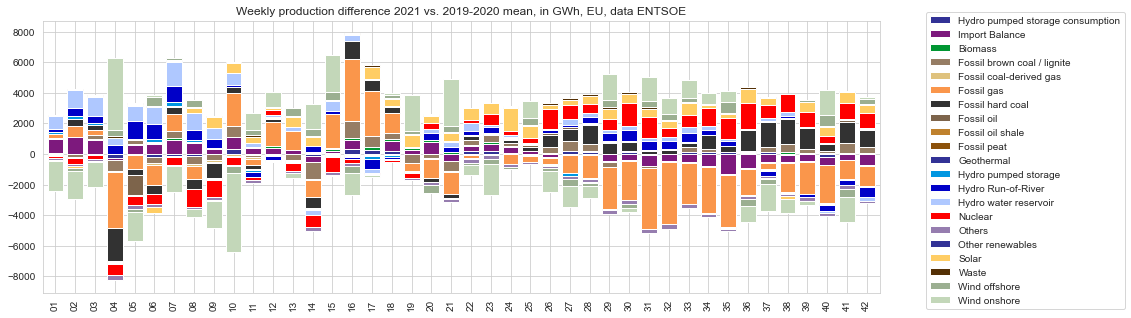

In [13]:
# Use this if you only want a subset
techs =['Wind onshore',
        'Wind offshore',
        'Solar',
        'Nuclear',
#       'Hydro Power',
        'Fossil gas',
#       'Oil',
        'Fossil hard coal',
        'Fossil brown coal / lignite'
        ]

fig, ax = plt.subplots(figsize=(15,5))

delta_sum.iloc[:42,:].plot.bar(stacked=True,
                            color=colors,
                            ax=ax,
                            width=.8,
                            title='Weekly production difference 2021 vs. 2019-2020 mean, in GWh, EU, data ENTSOE')

ax.legend(bbox_to_anchor=(1.05, 1.05))

<AxesSubplot:title={'center':'Monthly production difference 2021 vs. 2019-2020 mean, relative, EU, data ENTSOE'}>

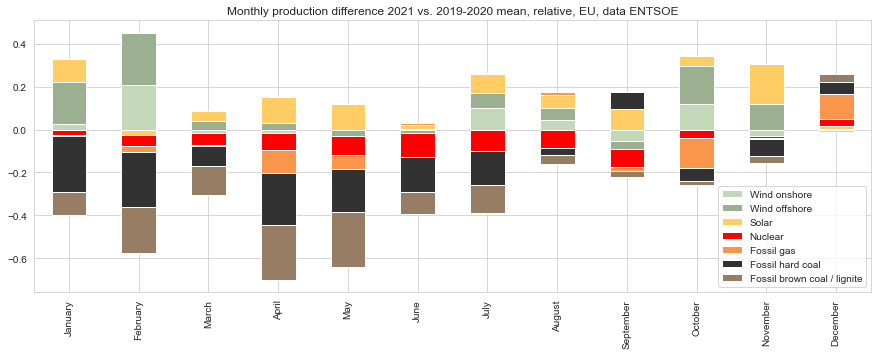

In [14]:
# Example for monthly difference and tech subset
ratio_sum[techs].plot.bar(stacked=True,
                        color=colors,
                        figsize=(15,5),
                        title='Monthly production difference 2021 vs. 2019-2020 mean, relative, EU, data ENTSOE')

In [15]:
delta

,Hydro pumped storage consumption,Import Balance,Biomass,Fossil brown coal / lignite,Fossil coal-derived gas,Fossil gas,Fossil hard coal,Fossil oil,Fossil oil shale,Fossil peat,...,Hydro pumped storage,Hydro Run-of-River,Hydro water reservoir,Nuclear,Others,Other renewables,Solar,Waste,Wind offshore,Wind onshore
2020-01-01,44.199979,226.355347,14.908675,75.619118,-5.957506,123.703027,43.597320,-0.326227,-3.604320,-8.564117,...,-1.919933,29.506339,187.924603,24.296894,-37.315512,1.161787,-6.807802,10.971470,-78.403968,-521.505101
2020-01-02,17.288050,160.306790,8.896330,-13.729114,-0.920294,-70.906430,-47.587598,-3.635582,-2.910720,-8.408928,...,-9.420888,17.393160,114.111394,-15.073738,-46.832578,1.025827,-22.756877,12.976378,-141.540552,-535.187141
2020-01-03,-35.414122,97.700352,3.592776,-155.049706,-2.662109,-393.285365,-173.846237,-3.252970,-5.234688,-9.473789,...,-38.331614,-13.969363,66.585475,-94.774421,-34.878269,0.923875,-4.612363,8.978712,25.939037,-177.977006
2020-01-04,25.988294,223.940602,4.017730,12.043858,-2.305387,160.812086,43.232093,2.351674,-3.605424,-6.216768,...,67.453680,63.208334,238.709818,-27.156326,1.450258,0.979843,-21.243720,8.780352,99.796421,-477.919584
2020-01-05,28.608384,211.227072,2.423928,35.202072,0.148152,422.947272,161.198702,10.426291,-1.907376,-4.472760,...,85.767374,124.201613,252.686501,-28.919731,-3.980765,1.163035,-24.568483,10.777834,101.114798,-275.977862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


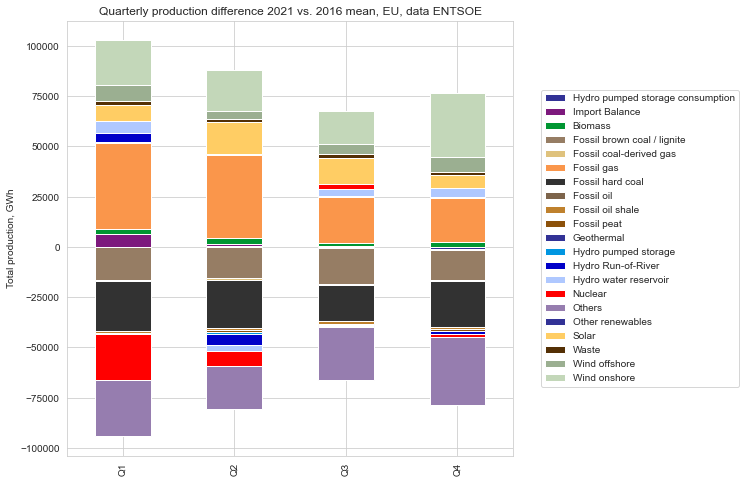

In [16]:
delta = (prod_df_2021.iloc[:355].set_index(prod_df_2016.iloc[:355].index)-prod_df_2016.iloc[:355])
ax = delta.groupby(pd.Grouper(freq='Q')).sum().plot.bar(stacked=True,
                        color=colors,
                        figsize=(8,8),
                        title='Quarterly production difference 2021 vs. 2016 mean, EU, data ENTSOE')
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax.set_ylabel('Total production, GWh')
leg = plt.legend( loc = 'center left',bbox_to_anchor=(1.05, 0.5), )

In [17]:
prod_df_2021.sum()-prod_df_2016.sum()

Hydro pumped storage consumption      -745.085652
Import Balance                        9354.922474
Biomass                               7094.373852
Fossil brown coal / lignite         -72419.474972
Fossil coal-derived gas              -1962.441134
Fossil gas                          120508.921201
Fossil hard coal                    -97207.071148
Fossil oil                             214.415514
Fossil oil shale                     -4862.113793
Fossil peat                          -2475.757704
Geothermal                            -366.271274
Hydro pumped storage                 -1837.915001
Hydro Run-of-River                   -6039.360771
Hydro water reservoir                 8368.800212
Nuclear                             -50873.296820
Others                             -115302.390286
Other renewables                       218.052307
Solar                                42487.130553
Waste                                 6412.569003
Wind offshore                        23638.909100


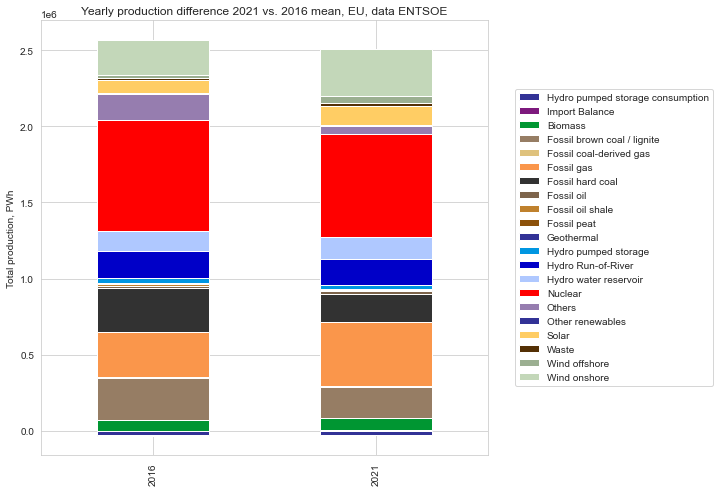

In [18]:
ax = pd.concat([prod_df_2016.sum(),prod_df_2021.sum()],axis=1, keys=['2016','2021']).T.plot.bar(stacked=True,
                        color=colors,
                        figsize=(8,8),
                        title='Yearly production difference 2021 vs. 2016 mean, EU, data ENTSOE')

# ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax.set_ylabel('Total production, PWh')
leg = plt.legend( loc = 'center left',bbox_to_anchor=(1.05, 0.5))

In [20]:
# pd.concat([prod_df_2016.groupby(columns_agg2, axis=1).sum().sum(),prod_df_2021.groupby(columns_agg2, axis=1).sum().sum()],axis=1, keys=['2016','2021']).T.plot.bar(stacked=True,
#                         cmap='tab10',
#                         figsize=(8,8),
#                         title='Yearly production difference 2021 vs. 2016 mean, EU, data ENTSOE')

# ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
# ax.set_ylabel('Total production, GWh')
# leg = plt.legend( loc = 'center left',bbox_to_anchor=(1.05, 0.5))

<AxesSubplot:>

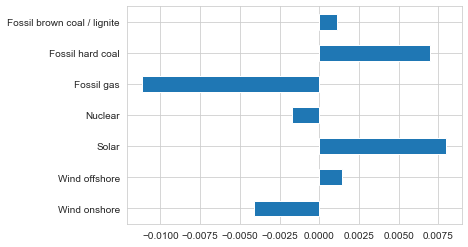

In [22]:
# Difference in share of annual mix in percentage points ("-0.02" means it decreased from x% to (x-2)%)
share_diff_2021[techs].plot.barh(stacked=True)

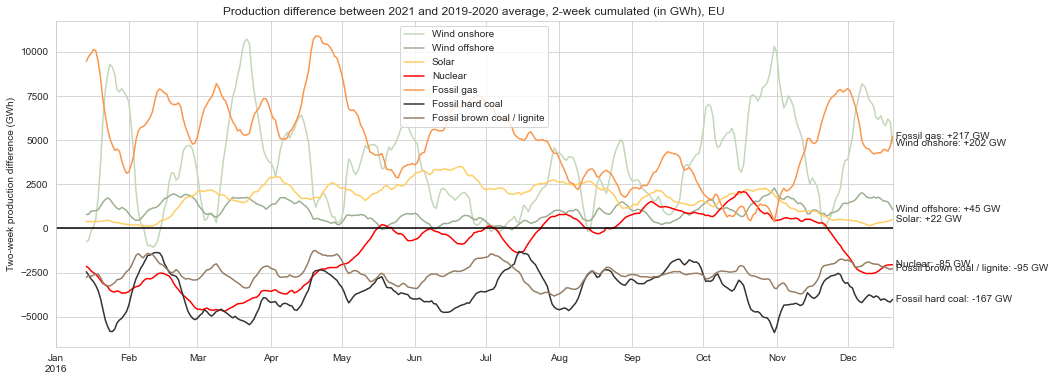

In [23]:
# Some other tests
fig, ax = plt.subplots(figsize=(15,6), facecolor='w')
to_plot = delta[techs].rolling(14).sum()

to_plot.plot(ax=ax,
             title='Production difference between 2021 and 2019-2020 average, 2-week cumulated (in GWh), EU',
            color=colors)

for c in to_plot:
    plt.text(to_plot.index[-1],
             to_plot[c][-1],
             f' {c}: {to_plot[c][-1]/(rolling*24):+.0f} GW',
            ha='left', va='center')
    
ax.set_ylabel('Two-week production difference (GWh)')

plt.axhline(1,color='k')

# TODO: change the year from 2020 to 2021

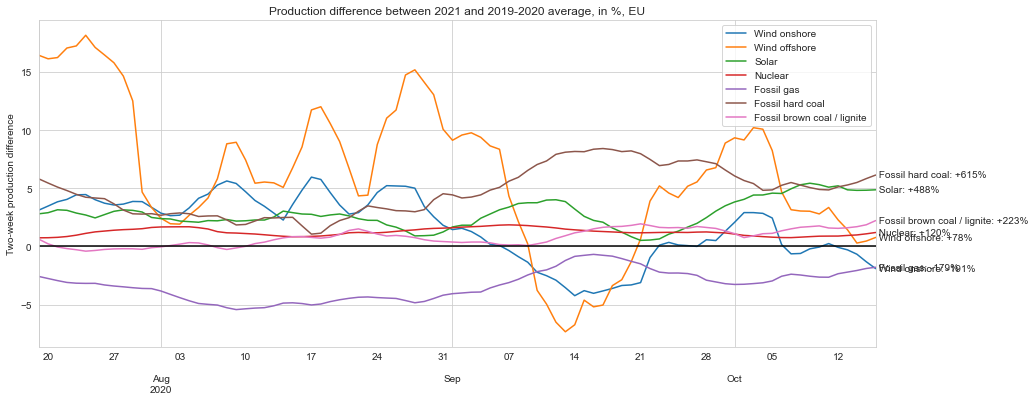

In [24]:
fig, ax = plt.subplots(figsize=(15,6), facecolor='w')
ratio.index = prod_df_2020.index
to_plot = ratio[techs].rolling(14).sum().iloc[200:290,:]

to_plot.plot(ax=ax, title='Production difference between 2021 and 2019-2020 average, in %, EU')

for c in to_plot:
    plt.text(to_plot.index[-1],
             to_plot[c][-1],
             f' {c}: {to_plot[c][-1]*100:+.0f}%',
            ha='left', va='center')
ax.set_ylabel('Two-week production difference')
plt.axhline(0,color='k')

For country comparison, you need to collect separate data and harmonise (labels are inconsistent).

In [25]:
to_plot.index[-1]

Timestamp('2020-10-16 00:00:00')

In [26]:
all_prods = dict()

In [27]:
year_range = range(2015,2022)
countries = ['fr','it','de','uk','pl','es']

colors={}

for country in countries:
    all_prods[country] = dict()
    for year in year_range: 
        all_prods[country][year], _, colors_i = plot_prod(country=country,
                                                          year=year,
                                                          display=False,
                                                          load=False)
    colors.update(**colors_i)

https://energy-charts.info/charts/energy/data/fr/day_2015.json
https://energy-charts.info/charts/energy/data/fr/day_2016.json
https://energy-charts.info/charts/energy/data/fr/day_2017.json
https://energy-charts.info/charts/energy/data/fr/day_2018.json
https://energy-charts.info/charts/energy/data/fr/day_2019.json
https://energy-charts.info/charts/energy/data/fr/day_2020.json
https://energy-charts.info/charts/energy/data/fr/day_2021.json
https://energy-charts.info/charts/energy/data/it/day_2015.json
https://energy-charts.info/charts/energy/data/it/day_2016.json
https://energy-charts.info/charts/energy/data/it/day_2017.json
https://energy-charts.info/charts/energy/data/it/day_2018.json
https://energy-charts.info/charts/energy/data/it/day_2019.json
https://energy-charts.info/charts/energy/data/it/day_2020.json
https://energy-charts.info/charts/energy/data/it/day_2021.json
https://energy-charts.info/charts/energy/raw_data/de/day_2015.json
https://energy-charts.info/charts/energy/raw_data/d

In [28]:
colors_annual_raw = {}
alpha_thr = 0.1

for k,v in colors.items():
    for year in year_range:
        for country in countries:
            colors_annual_raw[(country,year,k)] = \
                tuple((*v, alpha_thr + (1-alpha_thr) * ((year-year_range[0])/(year_range[-1]-year_range[0]))**3))

In [29]:
columns_agg = {'Hydro pumped storage consumption': 'Hydro pumped storage consumption',
               'Import Balance': 'Import balance',
               'Biomass': 'Biomass',
               'Fossil gas': 'Fossil gas',
               'Fossil oil': 'Fossil oil',
               'Hydro pumped storage': 'Hydro pumped storage generation',
               'Hydro Run-of-River': 'Hydro run-of-river',
               'Nuclear': 'Nuclear',
               'Others': 'Others',
               'Solar': 'Solar',
               'Waste': 'Waste',
               'Wind offshore': 'Wind',
               'Wind onshore': 'Wind',
               'Pumped Storage consumption': 'Hydro pumped storage consumption',
               'Hydro Power': 'Hydro',
               'Uranium': 'Nuclear',
               'Brown Coal': 'Brown coal',
               'Hard Coal': 'Hard coal',
               'Oil': 'Fossil oil',
               'Gas': 'Fossil gas',
               'Pumped Storage generation': 'Hydro pumped storage generation',
               'Wind': 'Wind',
               'Hydro Pumped Storage consumption': 'Hydro pumped storage consumption',
               'Fossil Brown Coal': 'Brown coal',
               'Fossil Hard Coal': 'Hard coal',
               'Fossil Oil': 'Fossil oil',
               'Fossil Gas': 'Fossil gas',
               'Hydro Pumped Storage generation': 'Hydro pumped storage generation',
               'Hydro Water Reservoir': 'Hydro',
               'Hydro water reservoir': 'Hydro',
               'Fossil hard coal': 'Hard coal'}

In [30]:
colors_annual = colors_annual_raw.copy()

for k,v in colors_annual_raw.items():

    if k[2] in columns_agg.keys():
        colors_annual[(k[0],k[1],columns_agg[k[2]])] = v
        
    if k[2].capitalize() in columns_agg.keys():
        colors_annual[(k[0],k[1],columns_agg[k[2].capitalize()])] = v

In [31]:
raw_agg = pd.concat([pd.concat(p, axis=0) for p in all_prods.values()],
                    keys=all_prods.keys())
prod_agg = raw_agg.groupby(columns_agg, axis=1).sum()
prod_agg.index.names=('country','year','date')
prod_agg = prod_agg.reset_index()
prod_agg['day of year'] = prod_agg['date'].dt.dayofyear
prod_agg = prod_agg.drop('date',axis=1)
# prod_agg = prod_agg.drop('date')
prod_agg = prod_agg.set_index(['day of year','year','country']).unstack(['year','country'])
prod_agg = prod_agg.reorder_levels(order=[2,1,0],axis=1)
try:
    prod_agg['de',2015]*=1000
    prod_agg['de',2016]*=1000
    prod_agg['de',2017]*=1000
    prod_agg['de',2018]*=1000
    prod_agg['de',2019]*=1000
except:
    pass

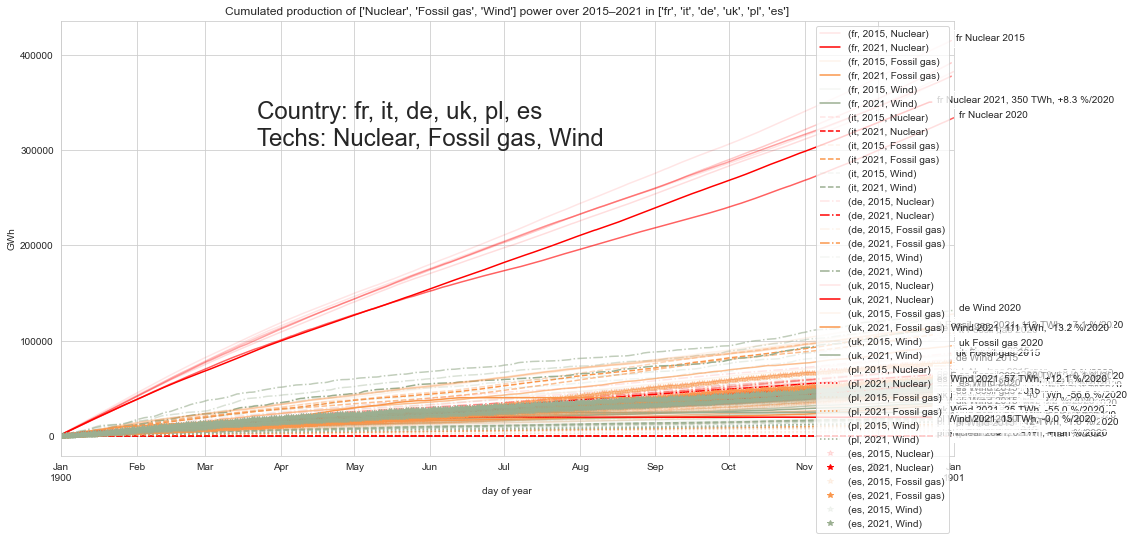

In [36]:
tech = [
    'Nuclear',
       'Fossil gas',
#         'Hard coal',
       'Wind',
#        'Solar'
       ]

styles = ['', '--', '-.', '-', ':', '*']

ls = []

for i,_ in enumerate(countries):
    ls.extend(len(tech) * len(year_range) * [styles[i]])

cumul = prod_agg.loc[:,(countries,
                        slice(None),
                        tech)].cumsum(skipna=True)

cumul.index = pd.to_datetime(cumul.index, format='%j')

cumul.columns.names = ['country',
                       'year',
                       'tech']

# cumul = cumul.groupby('year', axis=1).sum(min_count=1)

fig, ax = plt.subplots(figsize=(16,8), facecolor='w')

cumul.plot(color=colors_annual,
           ax=ax,
           style=ls)

for c in cumul.columns:
    
    last_v = cumul[c].last_valid_index()
    
    if last_v != None:

        if c[1] == 2021:
            v_2020 = cumul.loc[last_v,(c[0],2020,c[2])]
            gap = cumul[c][last_v] - v_2020 
            delta = 100 * (cumul[c][last_v]/v_2020 - 1)
            label = f'{c[0]} {c[2]} {c[1]}, {cumul[c][last_v]/1000:0.0f} TWh, {delta:+0.1f} %/2020'
#             label = f'{c[0]} {c[1]}'
        elif c[1] in [year_range[0], year_range[-2]]:
            label = f'{c[0]} {c[2]} {c[1]}'
        else:
            label = ''
        plt.text(last_v + timedelta(days=2),
                 cumul[c][last_v],
                 label,
                bbox=dict(facecolor=(1,1,1,0.5)))

plt.text(cumul.index[80],
         ax.get_ylim()[1] * .7,
         f'Country: ' + ', '.join(countries) + '\nTechs: ' + ', '.join(tech),
         fontsize=24)
# plt.text(-15, ax.get_ylim()[1] * .95, '@thomasgibon', fontsize=12, color='gray')
plt.title(f'Cumulated production of {tech} power over {year_range[0]}–{year_range[-1]} in {countries}')
ax.set_ylabel('GWh')

handles, labels = ax.get_legend_handles_labels()
by_label = {l:h for i,(l,h) in enumerate(zip(labels, handles)) if i%len(year_range) in [0,len(year_range)-1]}
plt.legend(by_label.values(), by_label.keys())


In [37]:
prod = pd.concat([prod_df_2019,prod_df_2020,prod_df_2021])
prod_ag = prod.groupby(columns_agg, axis=1).sum()

KeyError: ('fr', 2015, 'Nuclear')

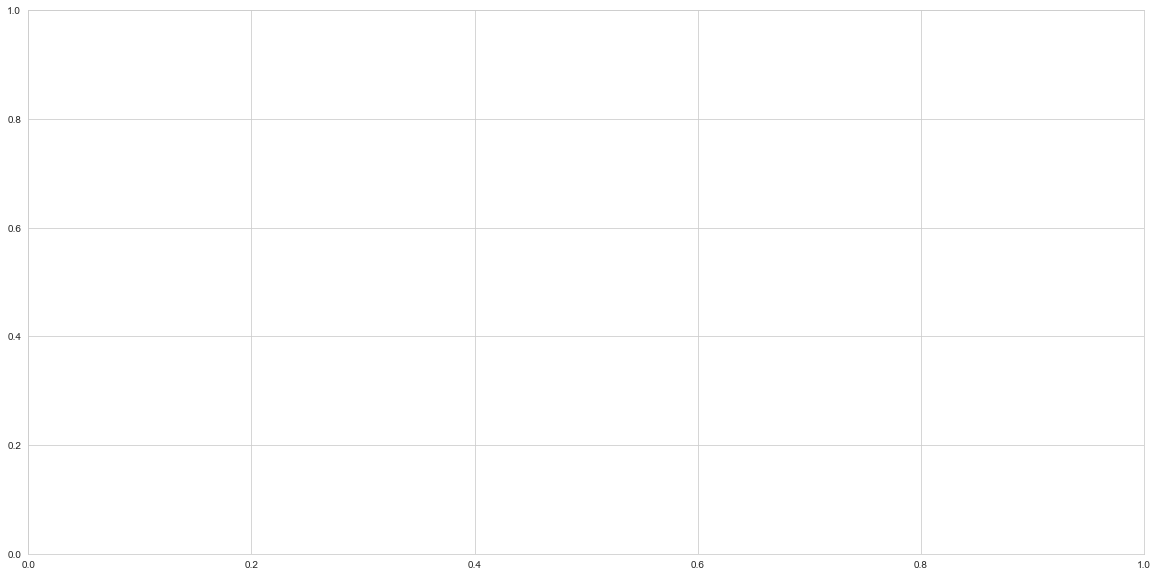

In [38]:
roll = prod_agg.loc[:,([c for c in countries if c not in ['pl']],slice(None),tech)].rolling(14).mean()

fig, ax = plt.subplots(figsize=(20,10), facecolor='w')

roll.plot(color=colors, ax=ax)

for c in roll.columns:
    last_v = roll[c].last_valid_index()
    
    if last_v != None:

        if c[1] == '2021':
            v_2020 = roll.loc[last_v,(c[0], '2020', tech)]
            gap = roll[c][last_v] - v_2020 
            delta = 100 * (roll[c][last_v]/v_2020 - 1)
#             label = f'{c[0]} {c[1]}, {roll[c][last_v]:0.0f} GWh, {delta:+0.1f} %/2020'
        else:
            label = f'{c[0]} {c[1]}'

        plt.text(roll[c].last_valid_index() + 5,
                 roll[c][roll[c].last_valid_index()],
                 label)
plt.text(200, ax.get_ylim()[1] * .6, tech, fontsize=40)
plt.text(0, ax.get_ylim()[1] * .95, '@thomasgibon', fontsize=12, color='gray')
plt.title(f'Rolling 15-day average production of {tech} power over 2019–2021 in EU')
ax.set_ylabel('GWh')
ax.get_legend().remove()

# Correlations

In [39]:
columns_agg2 = {'Hydro pumped storage consumption': 'Renewable firm',
               'Import Balance': 'Import balance',
               'Biomass': 'Renewable firm',
               'Fossil gas': 'Fossil',
               'Fossil oil': 'Fossil',
               'Hydro pumped storage': 'Renewable firm',
               'Hydro Run-of-River': 'Renewable firm',
               'Nuclear': 'Nuclear',
               'Others': 'Others',
               'Solar': 'Renewable variable',
               'Waste': 'Renewable firm',
               'Wind offshore': 'Renewable variable',
               'Wind onshore': 'Renewable variable',
               'Pumped Storage consumption': 'Renewable firm',
               'Hydro Power': 'Renewable firm',
               'Uranium': 'Nuclear',
               'Brown Coal': 'Fossil',
               'Hard Coal': 'Fossil',
               'Oil': 'Fossil',
               'Gas': 'Fossil',
               'Pumped Storage generation': 'Renewable firm',
               'Wind': 'Renewable variable',
               'Hydro Pumped Storage consumption': 'Renewable firm',
               'Fossil Brown Coal': 'Fossil',
               'Fossil Hard Coal': 'Fossil',
               'Fossil Oil': 'Fossil',
               'Fossil Gas': 'Fossil gas',
               'Hydro Pumped Storage generation': 'Renewable firm',
               'Hydro Water Reservoir': 'Renewable firm',
               'Hydro water reservoir': 'Renewable firm',
               'Fossil hard coal': 'Fossil'}

-0.0514959949164699 0.33193698602429705


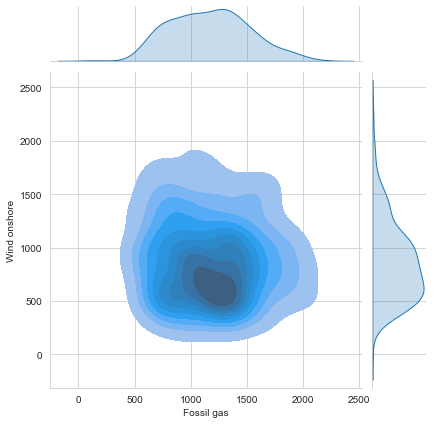

In [40]:
x = 'Fossil gas'
y = 'Wind onshore'

j = sns.jointplot(data=prod_df_2021.dropna(),
              x=x,
              y=y,
              kind='kde',
              fill=True,
#               cbar=True,
                 )

r, p = stats.pearsonr(prod_df_2021.dropna()[x], prod_df_2021.dropna()[y])
print(r,p)

ValueError: Could not interpret value `Renewable variable` for parameter `y`

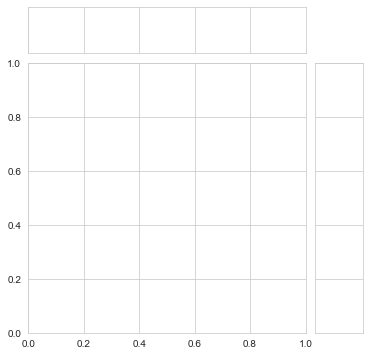

In [41]:
x = 'Nuclear'
y = 'Renewable variable'

j = sns.jointplot(data=prod_ag,
                  space=0,
              x=x,
              y=y,
              kind='kde',
              fill=True,
              cbar=True,
                 )

r, p = stats.pearsonr(prod_ag[x], prod_ag[y])
print(r,p)

ValueError: Could not interpret value `Fossil` for parameter `y`

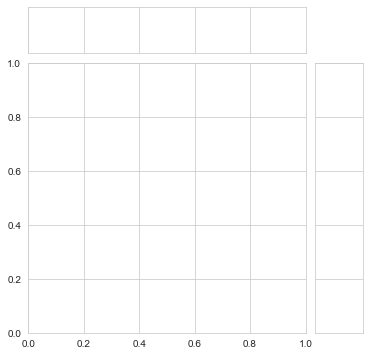

In [42]:
x = 'Nuclear'
y = 'Fossil'

j = sns.jointplot(data=prod_ag,
              x=x,
              y=y,
              kind='kde',
              fill=True,
              cbar=True)

r, p = stats.pearsonr(prod_ag[x], prod_ag[y])
print(r,p)

In [ ]:
# CO2, land use, mat

In [43]:
prod_agg

country           fr                                                        \
year            2015     2016     2017     2018     2019     2020     2021   
             Biomass  Biomass  Biomass  Biomass  Biomass  Biomass  Biomass   
day of year                                                                  
1            4.82880  6.04896  6.85056  7.05408  8.44800  8.31744  8.75616   
2            4.87392  5.99520  6.84384  7.10496  8.42592  8.20416  8.81664   
3            4.80960  5.96544  6.75936  7.02336  8.42496  7.93536  8.75200   
4            4.74912  5.93472  6.70176  6.95904  8.27712  7.96512  8.79552   
5            4.81632  6.27264  6.69216  6.58368  8.23488  7.94016  8.77728   
...              ...      ...      ...      ...      ...      ...      ...   
362          5.79840  6.83232  7.05120  8.21280  8.27232  8.83584      NaN   
363          5.73696  6.83328  7.06656  8.21568  8.24448  8.82720      NaN   
364          5.83680  6.79968  6.94080  8.19552  8.22432  8.87040      NaN   
365          5.98752  6.82944  6.85728  8.20992  8.32128  8.84736      NaN   
366              NaN  6.79968      NaN      NaN      NaN  8.83680      NaN   

country            it                     ...          pl              \
year             2015     2016      2017  ...        2019        2020   
              Biomass  Biomass   Biomass  ...        Wind        Wind   
day of year                               ...                           
1            0.000000  5.62368   6.65280  ...  110.259581   62.495693   
2            0.000000  6.12672   6.54528  ...  111.118762   65.934173   
3            0.273500  6.12576   7.08288  ...   75.548582   80.654794   
4            6.907200  6.28224   7.19136  ...   48.493296  107.406413   
5            6.535913  6.21792   7.07808  ...   66.158544   54.865978   
...               ...      ...       ...  ...         ...         ...   
362          0.000000  6.30240   9.17184  ...   46.694669  123.335462   
363          0.000000  6.19392   8.93184  ...   29.671680  102.239213   
364          0.000000  6.49248   9.33600  ...  101.223350   80.885242   
365          0.218000  6.50208  10.00512  ...  103.152643   37.856563   
366               NaN  6.75168       NaN  ...         NaN   21.283190   

country                        es                                              \
year              2021       2015       2016       2017       2018       2019   
                  Wind       Wind       Wind       Wind       Wind       Wind   
day of year                                                                     
1             8.792064   85.50912  213.93216   54.68448  243.03360   84.00768   
2             9.743386   53.23392  234.09216   90.57408  293.22624  191.09664   
3            43.588493   89.75328  319.30656   87.57600  279.61440  106.20096   
4            29.405981   92.99136  258.30624  139.64736  304.00128   77.69952   
5            56.335670   36.68064  294.75072  144.23424  219.39648  124.45920   
...                ...        ...        ...        ...        ...        ...   
362                NaN  267.11232   50.70720  292.97856  101.57280   55.11840   
363                NaN  145.56000   76.83264  252.29952  170.88576   49.14048   
364                NaN  193.03104   54.24864  231.27072  117.63264   46.18272   
365                NaN  105.84384   39.39360  270.78336   76.50624   41.35200   
366                NaN        NaN   42.97824        NaN        NaN        NaN   

country                            
year              2020       2021  
                  Wind       Wind  
day of year                        
1             24.01440  241.54080  
2             76.69440  272.28864  
3             79.43904  216.05760  
4            112.53504  129.00576  
5             55.94976   71.79744  
...                ...        ...  
362          275.79264        NaN  
363          390.90048        NaN  
364          306.05856        NaN  
365          233.34816        NaN  
366          

In [44]:
prod_agg.columns.levels

FrozenList([['de', 'es', 'fr', 'it', 'pl', 'uk'], [2015, 2016, 2017, 2018, 2019, 2020, 2021], ['Biomass', 'Brown coal', 'Fossil gas', 'Fossil oil', 'Hard coal', 'Hydro', 'Hydro pumped storage consumption', 'Hydro pumped storage generation', 'Hydro run-of-river', 'Import balance', 'Nuclear', 'Others', 'Solar', 'Waste', 'Wind']])

In [45]:
# GHG factors
GHG = {
    'Biomass': 60,
    'Brown coal':1100,
    'Hard coal':950,
    'Hydro':6,
    'Hydro pumped storage consumption':np.nan,
    'Hydro pumped storage generation':np.nan,
    'Hydro run-of-river':6,
    'Import balance':np.nan,
    'Fossil gas':490,
    'Nuclear':10,
    'Others':450,
    'Fossil oil':1000,
    'Solar':30,
    'Waste':50,
    'Wind':15
}

# Material factors

# Selection:
# Aluminium
# Chromium
# Cobalt
# Copper
# Manganese
# Molybdenum
# Nickel
# Silicon
# Zinc

mat = {
    'Biomass':100, # Between coal and gas...
    'Brown coal':183.3239272,
    'Hard coal':183.3239272,
    'Hydro':22.8,
    'Hydro pumped storage consumption':np.nan,
    'Hydro pumped storage generation':np.nan,
    'Hydro run-of-river':22.8,
    'Import balance':np.nan,
    'Fossil gas':45.3,
    'Nuclear':52.9,
    'Others':45,
    'Fossil oil':45, # Same as gas
    'Solar':601.4,
    'Waste':50,
    'Wind':276.4
}

# Land use in m2a per MWh
lu = {
    'Biomass':400,
    'Brown coal':17.4,
    'Hard coal':17.4,
    'Hydro':12.1,
    'Hydro pumped storage consumption':np.nan,
    'Hydro pumped storage generation':np.nan,
    'Hydro run-of-river':12.1,
    'Import balance':np.nan,
    'Fossil gas':1.76,
    'Nuclear':0.652,
    'Others':1.76,
    'Fossil oil':1.76,
    'Solar':22.0,
    'Waste':50,
    'Wind':1
}

In [46]:
set(prod_agg.columns.levels[2]) == set(GHG.keys())

True

In [47]:
GHG_emissions = prod_agg.mul(pd.Series(GHG), level=2).groupby(['country','year'], axis=1).sum()/1000
mat_reqs = prod_agg.mul(pd.Series(mat), level=2).groupby(['country','year'], axis=1).sum()/1000
land_use = prod_agg.mul(pd.Series(lu), level=2).groupby(['country','year'], axis=1).sum()/1000

<AxesSubplot:xlabel='year'>

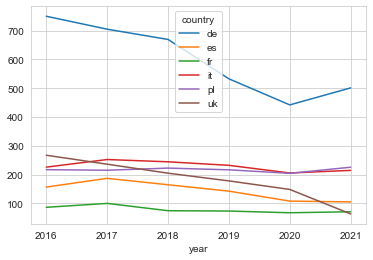

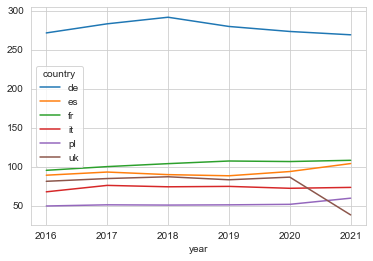

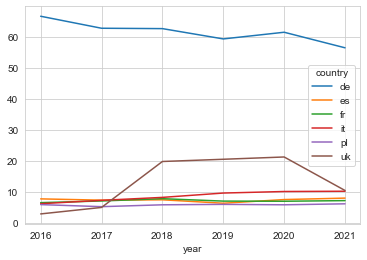

In [48]:
(GHG_emissions.sum()/len(GHG_emissions)).unstack().T[1:].plot()
(mat_reqs.sum()/len(mat_reqs)).unstack().T[1:].plot()
(land_use.sum()/len(land_use)).unstack().T[1:].plot()

In [97]:
countries=['de','fr']


# data_3d = pd.concat([mat_reqs[countries,2021],
#                      land_use[countries,2021],
#                      GHG_emissions[countries,2021]
#             ],axis=1)

data_3d = pd.concat([mat_reqs[countries].stack(),
                     land_use[countries].stack(),
                     GHG_emissions[countries].stack()
            ],
                    keys=['mat','lu','ghg'],axis=1)

data_3d = data_3d[data_3d.sum(1)>100].swaplevel(axis=1).sort_index(axis=1)

In [98]:
data_3d

country                   de                                 fr            \
                         ghg         lu         mat         ghg        lu   
day of year year                                                            
1           2015  546.680880  67.879716  212.817638   76.237848  5.769449   
            2016  613.670600  68.729910  171.355605   48.112938  4.645730   
            2017  620.241460  66.968827  236.388574  120.684256  6.360277   
            2018  312.719350  55.746636  286.163154   48.134444  6.342464   
            2019  251.729000  55.448312  291.862531   53.353313  6.048410   
...                      ...        ...         ...         ...       ...   
365         2018  482.310740  58.477488  173.857136   77.640247  6.313500   
            2019  368.884000  58.081580  227.774965   98.287252  7.680015   
            2020  421.627588  65.120244  242.770316   76.495236  6.987493   
366         2016  641.690990  69.677485  238.496889  141.548786  6.835931   
            2020  443.017530  65.475499  204.582661   77.919421  6.911326   

country                       
                         mat  
day of year year              
1           2015  105.821755  
            2016   97.024146  
            2017   92.768557  
            2018  121.386773  
            2019   93.320742  
...                      ...  
365         2018   97.442252  
            2019   96.546069  
            2020  104.006667  
366         2016   95.865617  
            2020   99.710838  

[2549 rows x 6 columns]

In [101]:
# generate some points of a 3D Gaussian
points_dict = {}
density_dict = {}

for country in countries:
    
    print(country)
    
    points = data_3d[country].T.values

    x_max, y_max, z_max = (500, 100, 1200)

    # do kernel density estimation to get smooth estimate of distribution
    # make grid of points
    x, y, z = np.mgrid[0:x_max:100j,
                       0:y_max:100j,
                       0:z_max:100j]
    kernel = stats.gaussian_kde(points)
    positions = np.vstack((x.ravel(), y.ravel(), z.ravel()))
    density = np.reshape(kernel(positions).T, x.shape)
    
    points_dict.append(points)
    density_dict.append(density)

de


AttributeError: 'dict' object has no attribute 'append'

In [71]:
tot_prod=prod_agg.groupby(['country','year'],axis=1).sum().sum()

GHG_y = (GHG_emissions.sum()/tot_prod).unstack().T * 1000
mat_y = (mat_reqs.sum()/tot_prod).unstack().T * 1000
lu_y  = (land_use.sum()/tot_prod).unstack().T * 1000


In [72]:
%matplotlib notebook

<IPython.core.display.Javascript object>


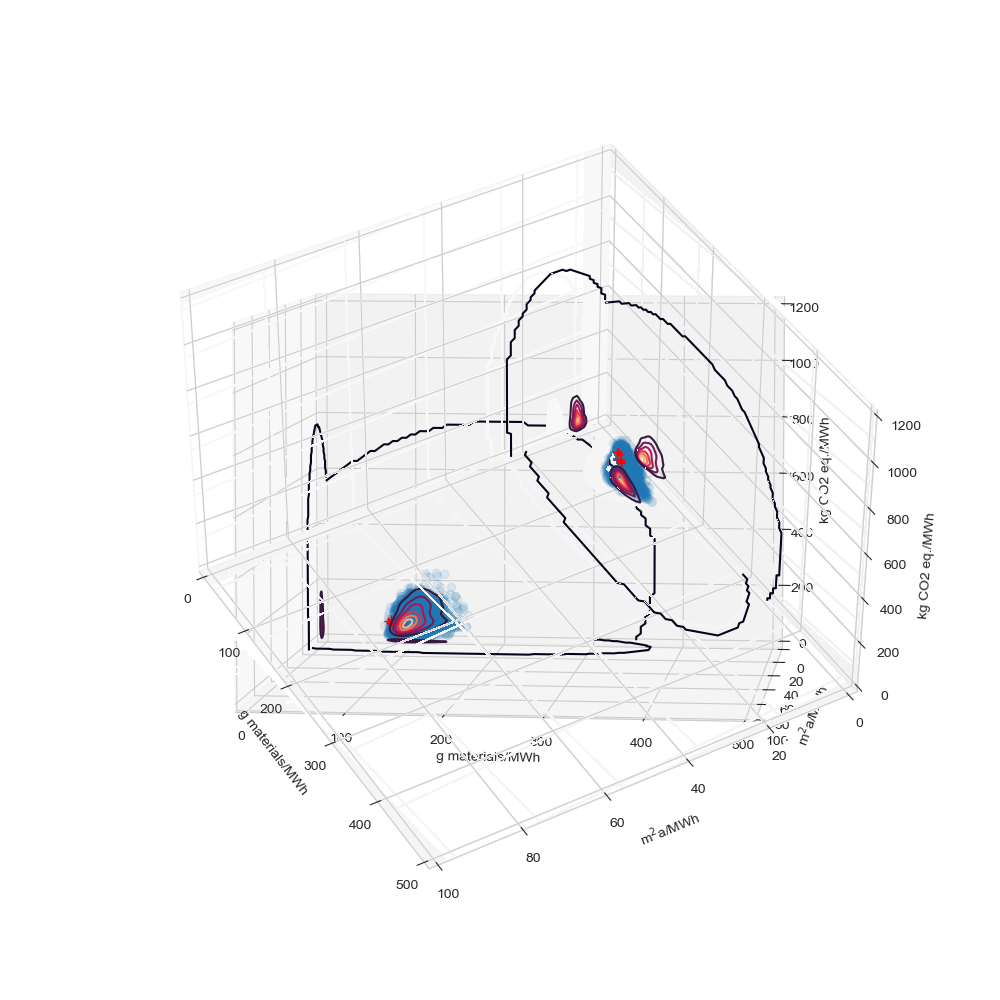

In [73]:
# plot points
fig, _  = plt.subplots(figsize=(10,10))
ax = plt.subplot(projection='3d')
ax.plot(points[0,:], points[1,:], points[2,:], 'o', alpha=0.1)

# plot projection of density onto z-axis
plotdat = np.sum(density, axis=2)
plotdat = plotdat / np.max(plotdat)
plotx, ploty = np.mgrid[0:x_max:100j,
                        0:y_max:100j]
ax.contour(plotx, ploty, plotdat, zdir='z')

#This is new
#plot projection of density onto y-axis
plotdat = np.sum(density, axis=1) #summing up density along y-axis
plotdat = plotdat / np.max(plotdat)
plotx, plotz = np.mgrid[0:x_max:100j,
                        0:z_max:100j]
ax.contour(plotx, plotdat, plotz, zdir='y')

#plot projection of density onto x-axis
plotdat = np.sum(density, axis=0) #summing up density along z-axis
plotdat = plotdat / np.max(plotdat)
ploty, plotz = np.mgrid[0:y_max:100j,
                        0:z_max:100j]
ax.contour(plotdat, ploty, plotz, zdir='x')
#continue with your code

ax.plot3D(mat_y[country],
          lu_y[country],
          GHG_y[country],
         'r+')

ax.set_xlim((0, x_max))
ax.set_ylim((y_max, 0))
# ax.invert_yaxis()
ax.set_zlim((0, z_max))
ax.set_xlabel('g materials/MWh')
ax.set_ylabel('m$^2$a/MWh')
ax.set_zlabel('kg CO2 eq./MWh')

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

No handles with labels found to put in legend.


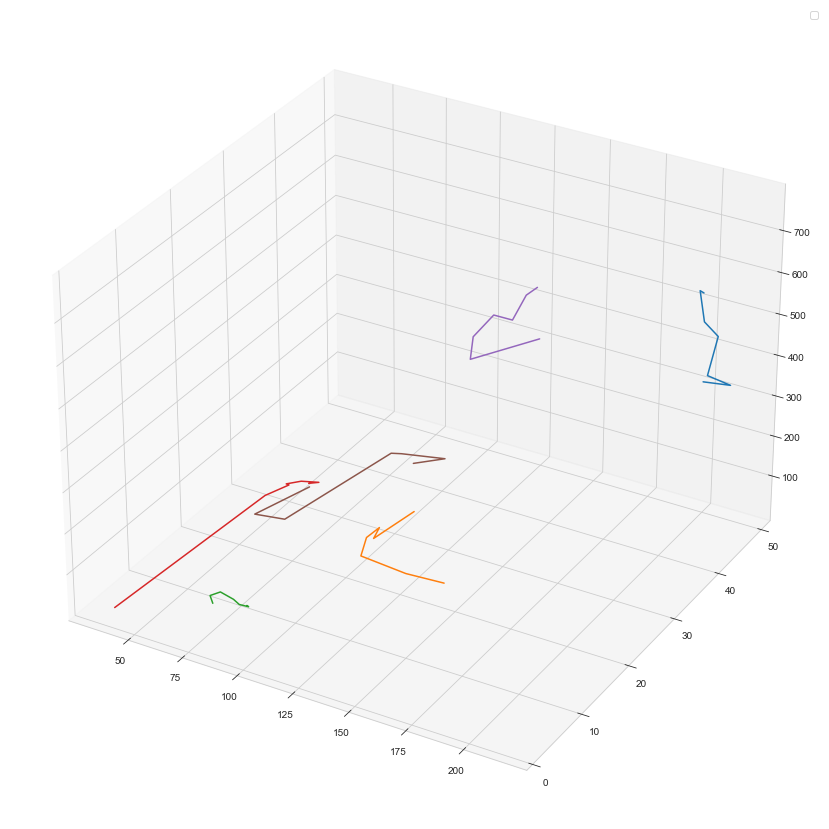

In [57]:
fig, _  = plt.subplots(figsize=(15,15))
ax = plt.subplot(projection='3d')
for c in GHG_y:
    ax.plot3D(mat_y[c], lu_y[c], GHG_y[c])
plt.legend()